In [57]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import check_random_state
from sklearn.metrics.pairwise import distance_metrics
import math

In [58]:
x = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])

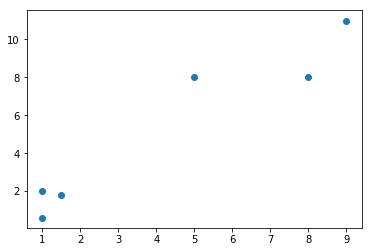

In [59]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [60]:

def min_distance_cluster(point, means, k):
    min_distance = 0
    for i in range(k):
        euc_distance = ((means[i] - point)**2).sum()
        if euc_distance < min_distance :
            min_distance = euc_distance
            cluster = i
    return cluster        

In [61]:
def fit(data, k = 2, max_iter = 100):
    means = [] #list of means
    for i in range(k):
        means.append(data[i])
    
    for i in range(max_iter):
        clusters = []
        for j in range(k):
            clusters.append([])
        #assign the data point to the cluster they belong to 
        for point in data:
            #find distance to all_mean values
            distances = [((m - point)**2).sum() for m in means]
            #find the min distance
            minDistance = min(distances)
            #find the mean for which we got the min_distance --- l
            l = distances.index(minDistance)
            #add this point to cluster l
            clusters[l].append(point)
            
        #update new_means
        change = False
        for j in range(k):
            new_mean = np.average(clusters[j], axis = 0)
            if not np.array_equal(means[j],new_mean):
                change = True
            means[j] = new_mean
        if not change:
            break
    return means         

In [62]:
def predict(test_data,means):
    predictions = []
    for point in test_data:
            #find distance to all_mean values
            distances = [((m - point)**2).sum() for m in means]
            #find the min distance
            minDistance = min(distances)
            #find the mean for which we got the min_distance --- l
            l = distances.index(minDistance)
            #add this point to cluster l
            predictions.append(l)  
    return predictions  
def mean(sil_samples):
    if(np.mean(sil_samples) > 0.4):
        return np.mean(sil_samples)
    else:
        return np.mean(sil_samples)

In [63]:
means = fit(x)

In [64]:
predictions = predict(x,means)
predictions

[0, 0, 1, 1, 0, 1]

# Silhouette score

In [65]:
def silhouette_score(X, labels, metric='euclidean', sample_size=None,
                          random_state=None, **kwds):
    if sample_size is not None:
        random_state = check_random_state(random_state)
        indices = random_state.permutation(X.shape[0])[:sample_size]
        X, labels = X[indices], labels[indices]          
    return mean(silhouette_samples(X, labels, metric=metric, **kwds))


def silhouette_samples(X, labels, metric='euclidean', **kwds):
    metric = distance_metrics()[metric]
    n = labels.shape[0]
    
    A = np.array([_intra_cluster_distance(X, labels, metric, i)
                  for i in range(n)])
    B = np.array([_nearest_cluster_distance(X, labels, metric, i)
                  for i in range(n)])
    sil_samples = (B - A) / np.maximum(A, B)
    return np.nan_to_num(sil_samples)

def metric1(x1, x2):
    return  math.sqrt(((x1-x2)**2).sum())

def _intra_cluster_distance(X, labels, metric, i):
    indices = np.where(labels == labels[i])[0]
    if len(indices) == 0:
        return 0.
    
    a = np.mean([metric1(X[i], X[j]) for j in indices if not i == j])
    return a


def _nearest_cluster_distance(X, labels, metric, i):
    label = labels[i]
    labels = labels.reshape(labels.shape[0],)
    b = np.min(
            [np.mean(
                [metric1(X[i], X[j]) for j in np.where(labels == cur_label)[0]]
            ) for cur_label in set(labels) if not cur_label == label])
    return b



In [66]:
predictions = np.array(predictions).reshape(-1,1)

In [67]:
predictions.shape

(6, 1)

In [68]:
print(silhouette_score(x,predictions))

0.7479566620911685


# IMPLEMENTING CLUSTER CLASS

In [69]:
class cluster:
    def __init__(self,k = 2, max_iter = 100):
        print("constructor")
        self.k = k
        self.max_iter = max_iter
    
    def fit(self, data):
        self.means = [] #list of means
        for i in range(self.k):
            self.means.append(data[i])
        for i in range(self.max_iter):
            clusters = []
            for j in range(self.k):
                clusters.append([])
            #assign the data point to the cluster they belong to 
            for point in data:
                #find distance to all_mean values
                distances = [((m - point)**2).sum() for m in self.means]
                #find the min distance
                minDistance = min(distances)
                #find the mean for which we got the min_distance --- l
                l = distances.index(minDistance)
                #add this point to cluster l
                clusters[l].append(point)
            #update new_means
            change = False
            for j in range(self.k):
                new_mean = np.average(clusters[j], axis = 0)
                if not np.array_equal(self.means[j],new_mean):
                    change = True
                self.means[j] = new_mean
            if not change:
                break  
    
    def predict(self, test_data):
        predictions = []
        for point in test_data:
                #find distance to all_mean values
                distances = [((m - point)**2).sum() for m in self.means]
                #find the min distance
                minDistance = min(distances)
                #find the mean for which we got the min_distance --- l
                l = distances.index(minDistance)
                #add this point to cluster l
                predictions.append(l)  
        return predictions 

In [70]:
k_means = cluster(2,10)

constructor


In [71]:
k_means.fit(x)

In [72]:
k_means.predict(x)

[0, 0, 1, 1, 0, 1]

In [73]:
k_means.means

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]

In [74]:
import pandas as pd

In [75]:
cr = pd.read_csv('crime2.csv')

In [76]:
cr.head()

,localities,assassination,theft,gang_rape,burglary,rape,assualt_attack,harassment(sexual),crime_total,area_total,longitude,latatitude,area/1000000,crime_total/area
0,JAFFARPUR KALAN,4,724,2,41,11,11,6,799,7.048170e+07,76.91555,28.59572,70.481699,11.336276
1,MUNDKA,3,244,1,14,5,12,4,270,4.859457e+07,76.96085,28.67042,48.594571,5.556176
2,BABA HARI DAS NAGAR,4,414,2,70,9,18,8,512,2.899435e+07,76.96681,28.62867,28.994346,17.658615
3,NAJAFGARH,4,900,1,60,4,10,10,973,8.473809e+06,76.98269,28.60975,8.473809,114.824393
4,CHHAWLA,4,485,1,65,6,16,11,575,2.632166e+07,76.99466,28.58691,26.321658,21.845129


In [77]:
data = cr.iloc[:,[1,2,3,4,5,6,7,13]].values

In [78]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
data = sc_X.fit_transform(data)

In [79]:
data[0:5]

array([[0.16666667, 0.55032468, 0.16666667, 0.29133858, 0.25581395,
        0.13432836, 0.125     , 0.00893937],
       [0.08333333, 0.16071429, 0.        , 0.07874016, 0.11627907,
        0.14925373, 0.075     , 0.00149898],
       [0.16666667, 0.2987013 , 0.16666667, 0.51968504, 0.20930233,
        0.23880597, 0.175     , 0.01707776],
       [0.16666667, 0.69318182, 0.        , 0.44094488, 0.09302326,
        0.11940299, 0.225     , 0.14215369],
       [0.16666667, 0.35633117, 0.        , 0.48031496, 0.13953488,
        0.20895522, 0.25      , 0.02246682]])

In [80]:
from sklearn.cluster import KMeans 

In [81]:
clf = cluster(5)

constructor


In [82]:
clf.fit(data)

In [83]:
cr.head()

,localities,assassination,theft,gang_rape,burglary,rape,assualt_attack,harassment(sexual),crime_total,area_total,longitude,latatitude,area/1000000,crime_total/area
0,JAFFARPUR KALAN,4,724,2,41,11,11,6,799,7.048170e+07,76.91555,28.59572,70.481699,11.336276
1,MUNDKA,3,244,1,14,5,12,4,270,4.859457e+07,76.96085,28.67042,48.594571,5.556176
2,BABA HARI DAS NAGAR,4,414,2,70,9,18,8,512,2.899435e+07,76.96681,28.62867,28.994346,17.658615
3,NAJAFGARH,4,900,1,60,4,10,10,973,8.473809e+06,76.98269,28.60975,8.473809,114.824393
4,CHHAWLA,4,485,1,65,6,16,11,575,2.632166e+07,76.99466,28.58691,26.321658,21.845129


In [84]:
clf.means

[array([0.19444444, 0.34907751, 0.14550265, 0.28696413, 0.27390181,
        0.28618811, 0.23174603, 0.2162297 ]),
 array([0.12689394, 0.13237898, 0.03030303, 0.11900501, 0.12843552,
        0.10447761, 0.11079545, 0.09573458]),
 array([0.4775641 , 0.26888736, 0.49358974, 0.24621442, 0.41144902,
        0.40298507, 0.29134615, 0.21755508]),
 array([0.475     , 0.66038961, 0.13333333, 0.57559055, 0.48139535,
        0.49850746, 0.575     , 0.65597766]),
 array([0.65217391, 0.30268916, 0.10144928, 0.41971927, 0.33771486,
        0.34198572, 0.31630435, 0.21152179])]

In [85]:
safety = []
c = 0
for li in clf.means:
    sum = 0;
    sum += li[1] + li[2] + li[6]
    safety.append((sum,c))
    c += 1
safety = sorted(safety)

In [86]:
safety

[(0.2734774695001968, 1),
 (0.7204427818558253, 4),
 (0.7263261870404727, 0),
 (1.0538232600732602, 2),
 (1.3687229437229438, 3)]

In [87]:
dict1 = {}
m = 0
for s in safety:
    dict1[s[1]] = m 
    m += 1

In [88]:
dict1

{1: 0, 4: 1, 0: 2, 2: 3, 3: 4}

In [89]:
clust_pred = np.array(clf.predict(data)).reshape(-1,1)

## silhoutee score using cluster 1 algorithm

In [90]:
print(silhouette_score(data,clust_pred))

0.18272665061126944


## silhoutee score using agglomerative clustering algorithm

In [91]:
from sklearn.cluster import AgglomerativeClustering
clf1 = AgglomerativeClustering(n_clusters = 5)

In [92]:
predictions = clf1.fit_predict(data)
print(silhouette_score(data,predictions))

0.16118537889676013


In [93]:
clust_pred = clust_pred.reshape(len(clust_pred),)
clust_pred[10:25]

array([1, 1, 4, 3, 4, 0, 2, 0, 1, 0, 0, 1, 2, 2, 4])

In [94]:
mag_pred = clust_pred.copy()
for i in range(len(clust_pred)):
    mag_pred[i] = dict1[clust_pred[i]]

In [95]:
mag_pred

array([2, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 0, 1, 4, 1, 2, 3, 2, 0, 2, 2, 0,
       3, 3, 1, 0, 0, 1, 2, 1, 2, 2, 3, 0, 3, 1, 2, 2, 2, 2, 3, 0, 0, 1,
       4, 3, 2, 1, 0, 4, 2, 3, 4, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 3, 4, 0, 2, 1,
       3, 2, 2, 1, 0, 2, 1, 2, 2, 2, 3, 2, 1, 4, 3, 2, 3, 0, 0, 2, 0, 2,
       0, 1, 1, 2, 0, 0, 0, 4, 0, 0, 3, 2, 0, 3, 0, 0, 4, 2, 3, 2, 0, 1,
       2, 0, 0, 3, 3, 0, 0, 3, 2, 0, 4, 2, 2, 3, 2, 3, 1, 2, 1, 3, 2, 0,
       2, 2, 0, 0, 3, 4, 1, 0, 0, 2, 2, 0])

In [96]:
mag_pred[10:25]

array([0, 0, 1, 4, 1, 2, 3, 2, 0, 2, 2, 0, 3, 3, 1])

In [97]:
from sklearn.cluster import DBSCAN

In [98]:
test = data[0:15,1:3]

In [99]:
test

array([[0.55032468, 0.16666667],
       [0.16071429, 0.        ],
       [0.2987013 , 0.16666667],
       [0.69318182, 0.        ],
       [0.35633117, 0.        ],
       [0.21590909, 0.33333333],
       [0.05113636, 0.        ],
       [0.2775974 , 0.5       ],
       [0.22564935, 0.33333333],
       [0.2775974 , 0.5       ],
       [0.30194805, 0.        ],
       [0.32142857, 0.        ],
       [0.36201299, 0.16666667],
       [0.8125    , 0.16666667],
       [0.30519481, 0.16666667]])

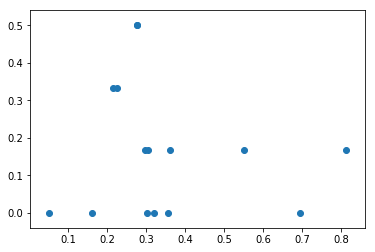

In [100]:
plt.scatter(test[:,0],test[:,1])
plt.show()

In [101]:
test_clf = cluster(4)

constructor


In [102]:
test_clf.fit(test)

In [103]:
test_pred = np.array(test_clf.predict(test)).reshape(-1,1)

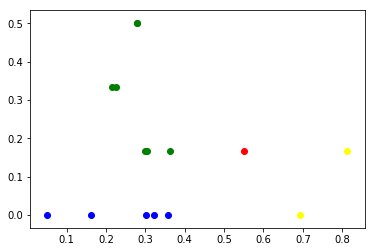

In [104]:
for i in range(15):
    if(test_pred[i] == 0):
        plt.scatter(test[i,0],test[i,1],color = 'red')
    elif(test_pred[i] == 1):
        plt.scatter(test[i,0],test[i,1],color = 'blue')
    elif(test_pred[i] == 2):
        plt.scatter(test[i,0],test[i,1],color = 'green')
    elif(test_pred[i] == 3):
        plt.scatter(test[i,0],test[i,1],color = 'yellow')

In [105]:
import numpy as np
import random

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

   

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

   
    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

In [106]:
M,C = kMedoids(data,5)

IndexError: index 10 is out of bounds for axis 1 with size 8

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

######################### K-Medoids

def assign_nearest(ids_of_mediods):
    dists = dist(x[:,None,:], x[None,ids_of_mediods,:])
    return np.argmin(dists, axis=1)


def dist(xa, xb):
    if EUCLIDEAN:
        return np.sqrt(np.sum(np.square(xa-xb), axis=-1))
    else:
        return np.sum(np.abs(xa - xb), axis=-1)


def find_medoids(assignments):
    medoid_ids = np.full(k, -1, dtype=int)
    subset = np.random.choice(n, batch_sz, replace=False)

    for i in range(k):
        indices = np.intersect1d(np.where(assignments==i)[0], subset)
        distances = dist(x[indices, None, :], x[None, indices, :]).sum(axis=0)
        medoid_ids[i] = indices[np.argmin(distances)]

    return medoid_ids


def kmeds(iterations=20):
    print("Initializing to random medoids.")
    ids_of_medoids = np.random.choice(n, k, replace=False)
    class_assignments = assign_nearest(ids_of_medoids)

    for i in range(iterations):
        print("\tFinding new medoids.")
        ids_of_medoids = find_medoids(class_assignments)
        print("\tReassigning points.")
        new_class_assignments = assign_nearest(ids_of_medoids)

        diffs = np.mean(new_class_assignments != class_assignments)
        class_assignments = new_class_assignments

        print("iteration {:2d}: {:.2%} of points got reassigned."
              "".format(i, diffs))
        if diffs <= 0.01:
            break

    return class_assignments, ids_of_medoids




print("n={}\td={}\tk={}\tbatch_size={} ".format(n, d, k, batch_sz))
print("Distance metric: ", "Eucledian" if EUCLIDEAN else "Manhattan")

print("\nMaking k-groups as:")
for kk in range(k):
    dd = (kk-1)%d
    print("    x[{}:{}, {}] += {}".format(kk*n//k, (kk+1)*n//k, dd , 3*d*kk))
    x[kk*n//k:(kk+1)*n//k,dd] += 3*d*kk

######################### Fitting
print("\nFitting Kmedoids.")
final_assignments, final_medoid_ids = kmeds()



np.set_printoptions(suppress=True)
print("\nKMedoids:")
print(x[final_medoid_ids, ])
print("K-Medoids class sizes:")
print(mismatch.sum(axis=-1))
print("\nKMeans:")
print(kmeans)
print("K-Means class sizes:")
print(mismatch.sum(axis=0))
print("\nMismatch between assignment to Kmeans and Kmedoids:")
print(mismatch)
print("Should ideally be {} * a permutation matrix.".format(n//k))